In [2]:
#This code anipulates data files and reads label text files

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import shutil
import librosa
import soundfile as sf
import random

In [3]:
#Reads the data from set of labels
with open('data/labels.txt', 'r') as f:
    file_lines = f.readlines()

keymap =  pd.DataFrame([string.split(',') for string in file_lines])

In [4]:
keymap = keymap[keymap.columns[0:7]]
#converts dataframe to numpy array
keymap_np = keymap.to_numpy()
keymap.head()

,0,1,2,3,4,5,6
0,Sample,original_spk,gender,original_time,type_voc,start_voc,end_voc
1,S0001,F19-R,Female,45.063,filler,6.612,6.896\n
2,S0002,F19-R,Female,68.675,laughter,8.025,9.183\n
3,S0003,F19-R,Female,81.819,filler,4.019,4.268
4,S0004,F19-R,Female,144.277,filler,5.555,6.089\n


In [6]:
print(keymap_np[10,:])

['S0010' 'F19-R' 'Female' '465.451' 'laughter' '6.705' '7.917\n']


In [16]:
np.argmax(keymap_np[10,:]=='laughter')

4

In [98]:
keymap_np[10,np.argmax(keymap_np[10,:]=='laughter')+2]

'7.917\n'

In [76]:
keymap_np[10,:]

array(['S0010', 'F19-R', 'Female', '465.451', 'laughter', '6.705',
       '7.917\n'], dtype=object)

In [77]:
#Declaration
labels = np.zeros((2763, 1))

# VISUALISING THE DATASET

In [78]:
t_start = []
t_end = []
for i in range(1,2763):
    if np.argmax(keymap_np[i,:]=='laughter') != 0:
        t_start.append(keymap_np[i,np.argmax(keymap_np[i,:]=='laughter')+1])
        t_end.append(keymap_np[i,np.argmax(keymap_np[i,:]=='laughter')+2])

        
t_start = np.array(np.char.strip(t_start,'\n')).astype(np.float)
t_end = np.array(np.char.strip(t_end,'\n')).astype(np.float)

In [79]:
mean = np.mean(t_end - t_start)#mean laughter time
print('Mean = ', mean)

std = np.std(t_end - t_start)#std
print('Standard Deviation = ', std)

Mean =  0.9588629441624367
Standard Deviation =  0.7208052790117665


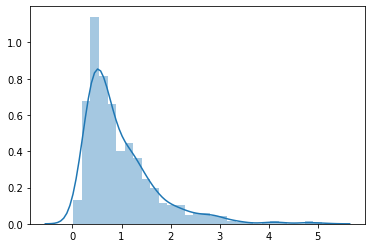

In [80]:
sns.distplot(t_end - t_start); # plots the distribution of laughter times

# SEGMENTING LAUGHTERS 

In [68]:
#SEGMENT LAUGHTER into windows of size 0.5 seconds. The windows overlap with each other to approximately 0.25 ms.

In [28]:
t_segment = 0.5
t_overlap = t_segment/2

In [25]:
#We re-use the above code
t_begin = 0
t_finish = 0

In [73]:
# t_start = []
counter = 0
for i in range(1,2763):
    if np.argmax(keymap_np[i,:]=='laughter') != 0:
        t_begin = np.array(np.char.strip(keymap_np[i,np.argmax(keymap_np[i,:]=='laughter')+1],'\n')).astype(np.float)
        t_finish = np.array(np.char.strip(keymap_np[i,np.argmax(keymap_np[i,:]=='laughter')+2],'\n')).astype(np.float)
        
        #Find number of segments
        if t_finish - t_begin >= 0.5:
            print('i =', i, 'Segmenting...')
            audio_path = 'data/data/S' + f'{i:04}' + '.wav'
            x , sr = librosa.load(audio_path, sr=None)
            n_segments = (((t_finish - t_begin)//t_overlap) - 1)#gives number of segments
            for i in range(int(n_segments)):
                counter = counter + 1
                t1 = t_begin + i*t_overlap
                t2 = t1 + t_segment
                sf.write('data/Segmented_Laugh/' + f'{counter}' + '.wav', x[int(t1*sr):int(t2*sr)], sr)

i = 2 Segmenting...
i = 5 Segmenting...
i = 6 Segmenting...
i = 9 Segmenting...
i = 10 Segmenting...
i = 11 Segmenting...
i = 12 Segmenting...
i = 13 Segmenting...
i = 15 Segmenting...
i = 17 Segmenting...
i = 21 Segmenting...
i = 23 Segmenting...
i = 24 Segmenting...
i = 26 Segmenting...
i = 27 Segmenting...
i = 31 Segmenting...
i = 33 Segmenting...
i = 38 Segmenting...
i = 46 Segmenting...
i = 50 Segmenting...
i = 52 Segmenting...
i = 66 Segmenting...
i = 67 Segmenting...
i = 71 Segmenting...
i = 87 Segmenting...
i = 90 Segmenting...
i = 98 Segmenting...
i = 103 Segmenting...
i = 104 Segmenting...
i = 105 Segmenting...
i = 108 Segmenting...
i = 115 Segmenting...
i = 124 Segmenting...
i = 125 Segmenting...
i = 126 Segmenting...
i = 127 Segmenting...
i = 130 Segmenting...
i = 135 Segmenting...
i = 136 Segmenting...
i = 137 Segmenting...
i = 138 Segmenting...
i = 140 Segmenting...
i = 141 Segmenting...
i = 142 Segmenting...
i = 147 Segmenting...
i = 153 Segmenting...
i = 154 Segmenting.

i = 1886 Segmenting...
i = 1888 Segmenting...
i = 1890 Segmenting...
i = 1894 Segmenting...
i = 1896 Segmenting...
i = 1898 Segmenting...
i = 1900 Segmenting...
i = 1925 Segmenting...
i = 1934 Segmenting...
i = 1957 Segmenting...
i = 1971 Segmenting...
i = 1978 Segmenting...
i = 1993 Segmenting...
i = 1997 Segmenting...
i = 2000 Segmenting...
i = 2006 Segmenting...
i = 2010 Segmenting...
i = 2027 Segmenting...
i = 2049 Segmenting...
i = 2051 Segmenting...
i = 2057 Segmenting...
i = 2059 Segmenting...
i = 2083 Segmenting...
i = 2085 Segmenting...
i = 2093 Segmenting...
i = 2094 Segmenting...
i = 2099 Segmenting...
i = 2101 Segmenting...
i = 2103 Segmenting...
i = 2104 Segmenting...
i = 2124 Segmenting...
i = 2126 Segmenting...
i = 2127 Segmenting...
i = 2150 Segmenting...
i = 2157 Segmenting...
i = 2194 Segmenting...
i = 2195 Segmenting...
i = 2201 Segmenting...
i = 2202 Segmenting...
i = 2204 Segmenting...
i = 2205 Segmenting...
i = 2207 Segmenting...
i = 2217 Segmenting...
i = 2223 Se

# SEGMENTING NON-LAUGHTERS

In [74]:
# t_start = []
counter = 0
for i in range(1,2763):
    if np.argmax(keymap_np[i,:]=='laughter') != 0:
    #t_begin = np.array(np.char.strip(keymap_np[i,np.argmax(keymap_np[i,:]=='laughter')+1],'\n')).astype(np.float)
        t_begin = np.array(np.char.strip(keymap_np[i,np.argmax(keymap_np[i,:]=='laughter')+1],'\n')).astype(np.float)
    if t_begin > 0 :
        print('i =', i, 'Segmenting...')
        audio_path = 'data/data/S' + f'{i:04}' + '.wav'
        x , sr = librosa.load(audio_path, sr=None)
        n_segments = (((t_begin)//t_overlap) - 1)#gives number of segments
        for i in range(int(n_segments)):
            counter = counter + 1
            t1 = i*t_overlap
            t2 = t1 + t_segment
            sf.write('data/Segmented_NonLaugh4/' + f'{counter}' + '.wav', x[int(t1*sr):int(t2*sr)], sr)
    if counter > 2752:
        break

i = 1 Segmenting...
i = 2 Segmenting...
i = 3 Segmenting...
i = 4 Segmenting...
i = 5 Segmenting...
i = 6 Segmenting...
i = 7 Segmenting...
i = 8 Segmenting...
i = 9 Segmenting...
i = 10 Segmenting...
i = 11 Segmenting...
i = 12 Segmenting...
i = 13 Segmenting...
i = 14 Segmenting...
i = 15 Segmenting...
i = 16 Segmenting...
i = 17 Segmenting...
i = 18 Segmenting...
i = 19 Segmenting...
i = 20 Segmenting...
i = 21 Segmenting...
i = 22 Segmenting...
i = 23 Segmenting...
i = 24 Segmenting...
i = 25 Segmenting...
i = 26 Segmenting...
i = 27 Segmenting...
i = 28 Segmenting...
i = 29 Segmenting...
i = 30 Segmenting...
i = 31 Segmenting...
i = 32 Segmenting...
i = 33 Segmenting...
i = 34 Segmenting...
i = 35 Segmenting...
i = 36 Segmenting...
i = 37 Segmenting...
i = 38 Segmenting...
i = 39 Segmenting...
i = 40 Segmenting...
i = 41 Segmenting...
i = 42 Segmenting...
i = 43 Segmenting...
i = 44 Segmenting...
i = 45 Segmenting...
i = 46 Segmenting...
i = 47 Segmenting...
i = 48 Segmenting...
i

i = 389 Segmenting...
i = 390 Segmenting...
i = 391 Segmenting...


KeyboardInterrupt: 